In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

A graph of 5 nodes:
0:[1, 2]
1:[2]
2:[3]
3:[4]
4:[]

Nodes: [0, 1, 2, 3, 4]
Edges: [(0, 1), (0, 2), (1, 2), (2, 3), (3, 4)]


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


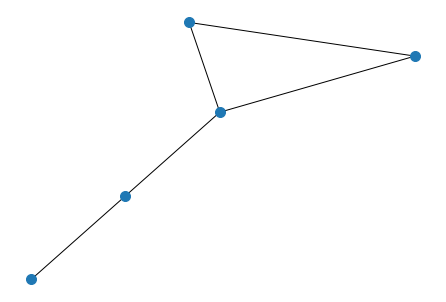

In [2]:
class Graph():
    def __init__(self):
        self.gdict = {}
        
    def add_node(self,node):
        if node not in self.gdict:
            self.gdict[node] = []
            
    def add_edge(self,node1,node2):
        self.add_node(node1)
        self.add_node(node2)
        
        if node1 not in self.gdict[node2]:
            self.gdict[node1].append(node2)
        
        if node2 not in self.gdict[node1]:
            self.gdict[node2].append(node1)
    
    def nodes(self):
        return list(self.gdict.keys())
    
    def edges(self):
        out = []
        for node, links in self.gdict.items():
            for link in links:
                if node < link:
                    out.append((node,link))
        return out
    
    def plot(self):
        g_nx = nx.Graph()
        g_nx.add_nodes_from(self.nodes())
        g_nx.add_edges_from(self.edges())
        nx.draw_kamada_kawai(g_nx, node_size=100)
    
    def __str__(self):
        out = 'A graph of ' + str(len(self.gdict)) + ' nodes:\n'
        for node in self.gdict:
            out += str(node) + ':' + str(self.gdict[node]) + '\n'
        return out
                               
g = Graph()
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(1,2)
g.add_edge(2,3)
g.add_edge(3,4)
print(g)
print('Nodes:', g.nodes())
print('Edges:', g.edges())
g.plot()

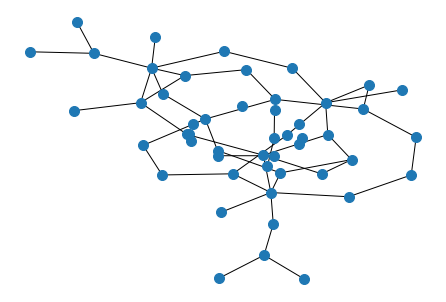

In [3]:
N_NODES = 50
N_EDGES = N_NODES

g = Graph()

for i in range(N_NODES):
    g.add_node(i)

edges = []

while len(edges) < N_EDGES:
    n1 = np.random.randint(low = 0, high = N_NODES)
    n2 = np.random.randint(low = 0, high = N_NODES)
    
    if n2 < n1:
        n1,n2 = n2,n1
    
    if (n1,n2) not in edges and n1!=n2:
        g.add_edge(n1,n2)
        edges.append((n1,n2))
        
#print(g)
g.plot()

[3, 2, 2, 0, 2, 6, 1, 2, 2, 2, 3, 1, 1, 0, 5, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[23. 13. 10.  2.  0.  1.  1.]


Text(0, 0.5, 'Frequency')

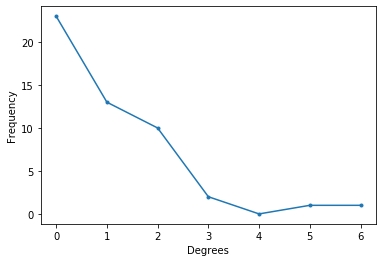

In [4]:
degrees = []

for node,links in g.gdict.items():
    degrees.append(len(links))
print(degrees)

hist = np.zeros(max(degrees)+1)

for degree in degrees:
    hist[degree] += 1
print(hist)

plt.plot(hist,'.-');
plt.xlabel('Degrees')
plt.ylabel('Frequency')

# Homework

[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 3]
[3. 7. 0. 1.]


Text(0, 0.5, 'Frequency')

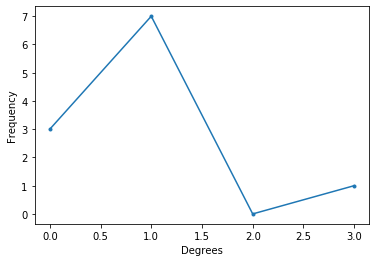

In [5]:
n_nodes = 10
n_edges = n_nodes

g = Graph()

for i in range(0, n_nodes):
    g.add_node(i)

for t in range(0, n_edges):
    n2 = np.random.randint(low = 0, high = n_nodes)
    n1 = n2-1
    
    edges = []

    if (n1,n2) in edges:
        pass
    else:
        g.add_edge(n1,n2)
        edges.append((n1,n2))

degrees = []
for node,links in g.gdict.items():
    degrees.append(len(links))

print(degrees)
hist = np.zeros(max(degrees)+1)
for degree in degrees:
    hist[degree] += 1
print(hist)

plt.plot(hist,'.-');
plt.xlabel('Degrees')
plt.ylabel('Frequency')

I couldn't figure out how to locate the node I just added, so instead I decided to define n2 first and set n1 equal to n2-1 which seemed to work, though I know it isn't ideal. The degree distributions of both algorithms are skewed towards the left, though in the G(n,M) algorithm it is more pronounced and this algorithm seems to have more variation.  
